## Libraries

In [1]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

## Loading Data

In [2]:
train = pd.read_csv("D:/Natural Language Processing with Disaster Tweets/train.csv")

## Preprocessing

In [3]:
nltk.download('stopwords')
nltk.download('punkt')

def clean_and_tokenize_english_text(text):
    eng_stopwords = set(stopwords.words("english"))
    eng_punctuation = '،؛؟.ـ،؛؟ـ!"#$%&\'()*+,-/:;<=>?@[\\]^_`{|}~-*%^#@!^'
    words = word_tokenize(text)
    cleaned_words = [word for word in words if word.lower() not in eng_stopwords and word not in eng_punctuation]
    cleaned_words = list(set(cleaned_words))  # إزالة التكرار
    cleaned_text = ' '.join(cleaned_words)
    return cleaned_text

train['cleaned_text'] = train['text'].apply(clean_and_tokenize_english_text)

# إزالة الصفوف التي تحتوي على نصوص نظيفة فارغة
train = train[train['cleaned_text'].str.strip() != '']

# تحويل النصوص إلى تمثيل قابل للاستخدام
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(train['cleaned_text'])
y = train['target']

[nltk_data] Downloading package stopwords to C:\Users\EL-
[nltk_data]     WAZIR\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\EL-
[nltk_data]     WAZIR\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Splitting Data

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Modeling and Evaluation

In [7]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.87      0.83       874
           1       0.80      0.70      0.75       649

    accuracy                           0.80      1523
   macro avg       0.80      0.78      0.79      1523
weighted avg       0.80      0.80      0.79      1523

Confusion Matrix:
 [[757 117]
 [193 456]]


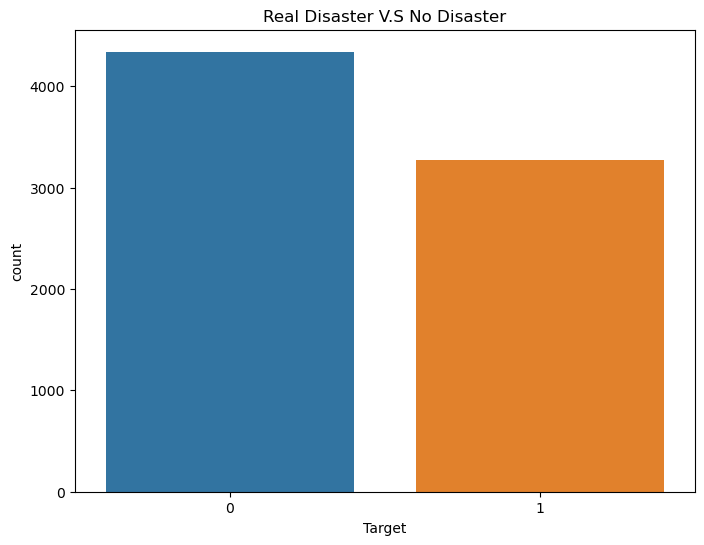

In [8]:
plt.figure(figsize=(8,6))
sns.countplot(x='target', data=train)
plt.xlabel("Target")
plt.title("Real Disaster V.S No Disaster")
plt.show()